# Machine Learning Walkthrough

In this tutorial we'll use the titanic data set and see how we can increase the efficiency of our model.

You can find it here: https://www.kaggle.com/c/titanic/data

In [168]:
%load_ext watermark
%watermark -a 'Vaibhav Srivastav' -nmv --packages numpy,pandas,scikit-learn,matplotlib,Seaborn
#Helps knowing what version was used later on

Vaibhav Srivastav Mon Jul 18 2016 

CPython 2.7.11
IPython 4.1.2

numpy 1.10.4
pandas 0.18.0
scikit-learn 0.17.1
matplotlib 1.5.1
Seaborn 0.7.1

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.2.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# About the Dataset

**VARIABLE DESCRIPTIONS**: <br>
survival ==        Survival (0 = No; 1 = Yes) <br>
pclass  ==          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) <br>
name  ==            Name <br>
sex  ==             Sex <br>
age  ==             Age<br>
sibsp  ==         Number of Siblings/Spouses Aboard <br>
parch  ==           Number of Parents/Children Aboard <br>
ticket  ==          Ticket Number <br>
fare  ==            Passenger Fare <br>
cabin  ==           Cabin <br>
embarked  ==        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) <br>

**SPECIAL NOTES**:<br>
Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower <br>

Age is in Years; Fractional if Age less than One (1) 

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

*Sibling*:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic <br>
*Spouse*:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored) <br>
*Parent*:   Mother or Father of Passenger Aboard Titanic <br>
*Child*:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic <br>

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

**It is of prime importance to understand the data first and then preprocess it further in order to get better predictions out of your model**

In [1]:
import pandas as pd

df = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Here, if you see the count row, all other columns except 'Age' have a value of 891 and Age has a value of 714, that means we are dealing with missing values over here!

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
#You can use mean or mode also

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This solves our missing values problem but also shows another one of the most common problems in Data Preparation that only numeric columns are shown in df.describe() table.

The way to do this is to convert your non-numeric columns into numeric (for better predictions)

Non-Numeric columns - Name, Sex, Cabin, Embarked and Ticket

We can use the Sex and Embarked column to better leverage the Dataset.

In [5]:
#Sex can either be Male or Female

df.loc[df["Sex"]== "male", "Sex"] = 0
df.loc[df["Sex"]== "female", "Sex"] = 1
df_test.loc[df_test["Sex"]== "male", "Sex"] = 0
df_test.loc[df_test["Sex"]== "female", "Sex"] = 1


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
print df["Embarked"].unique()
print df_test["Embarked"].unique()

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


Here, again we can see missing values in the "Embarked" column, lets fix this:

In [9]:
df["Embarked"] = df["Embarked"].fillna("S")
print df["Embarked"].unique()

['S' 'C' 'Q']


Now, Let's convert this non-numeric column into numeric!

In [10]:
df.loc[df["Embarked"]=="S", "Embarked"] = 0
df.loc[df["Embarked"]=="C", "Embarked"] = 1
df.loc[df["Embarked"]=="Q", "Embarked"] = 2
df_test.loc[df_test["Embarked"]=="S", "Embarked"] = 0
df_test.loc[df_test["Embarked"]=="C", "Embarked"] = 1
df_test.loc[df_test["Embarked"]=="Q", "Embarked"] = 2


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We can see that even though we converted the columns Sex and Embarked into numeric one's it still shows that they are object type, lets fix this by converting the type of that particular column.

In [13]:
print df["Sex"].unique()
print df["Embarked"].unique()
print df_test["Sex"].unique()
print df_test["Embarked"].unique()
 

[0 1]
[0 1 2]
[0 1]
[2 0 1]


In [14]:
df["Sex"] = df["Sex"].astype(int)
df["Embarked"] = df["Embarked"].astype(int)
df_test["Sex"] = df_test["Sex"].astype(int)
df_test["Embarked"] = df_test["Embarked"].astype(int)

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [16]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

In [17]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.464115
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [18]:
def get_title(word):
    return word.split(',')[-1].split('.')[0].strip()

In [19]:
df['title'] = df['Name'].apply(get_title)
df_test['title'] = df_test['Name'].apply(get_title)

In [20]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [21]:
def title_no(x):
    if x.find('Mr')>-1 or x.find('Master')>-1 or x.find('Dr')>-1 or x.find('Major')>-1 or x.find('Sir')>-1 or x.find('Capt')>-1 or x.find('Col')>-1: return 1
    if x.find('Mrs')>-1 or x.find('Miss')>-1 or x.find('Ms')>-1 or x.find('Lady')>-1 or x.find('Mme')>-1: return 2
    if x.find('Mlle')>-1 or x.find('the Countess')>-1 or x.find('Jonkheer')>-1 or x.find('Don')>-1 or x.find('Rev')>-1: return 3

In [22]:
df['title_no'] = df['title'].apply(title_no)
df_test['title_no'] = df_test['title'].apply(title_no)

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_no
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392,1.232323
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,0.450853
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.000000


In [25]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df_test['family_size'] = df_test['SibSp'] + df_test['Parch'] + 1

In [26]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
title           object
title_no         int64
family_size      int64
dtype: object

In [27]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
title           object
title_no         int64
family_size      int64
dtype: object

In [99]:
df_test_features = df_test[["Pclass", "Sex", "SibSp", "Fare", "Age", "title_no", "family_size"]]


Our data is now ready!
Let's dive into machine learning :D

One more step, Splitting labels and features:

In [100]:
df.dtypes
df_features = df[["Pclass", "Sex", "SibSp", "Fare", "Age", "title_no", "family_size"]]
df_labels = df[["Survived"]]

# Logistic Regression

**Logistic regression** measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

**Parameters**:<br>
1. *C*: It is the inverse of regularization strength, must be positive, choose smaller value for stronger regularization
2. *fit_intercept*: Specifies if a bias or intercept should be added to the function
3. *n_jobs*: Number of CPU cores to be used during Cross Validation
4. *verbose*: set any integer number for verbosity
5. *multi_class*: 'ovr' for a binary problem
6. *random_state*: The seed of the pseudo number generator to use when shuffling the data
7. *solver*: Small Datasets- liblinear, Large- sag, Multiclass- newton_cg, lbfgs

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

model = LogisticRegression(random_state=1)

scores = cross_validation.cross_val_score(model, df_features, df["Survived"], cv=5)
print scores

[ 0.77653631  0.78212291  0.78651685  0.76966292  0.83050847]


In [102]:
#Doing a bit of parameter tuning
model_tuned_logistic = LogisticRegression(random_state=1, C=0.1, fit_intercept=True)
scores = cross_validation.cross_val_score(model_tuned_logistic, df_features, df["Survived"], cv=5)
print scores

[ 0.78212291  0.79888268  0.78089888  0.76966292  0.82485876]


As you can see even though the increase in the scores was not that much but it did increase and even 0.0001 can make a difference :D

# Linear Regression

In **linear regression**, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data.

**Parameters**:

All the parameters are the same in between Linear and Logistic Regression.


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

model_linear = LinearRegression(normalize=True)

scores = cross_validation.cross_val_score(model_linear, df_features, df["Survived"], cv=5)
print scores

[ 0.33820739  0.37585375  0.39127922  0.30427011  0.46386252]


# Random Forest

It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

**Parameters**:
1. *n_estimators*: Number of trees in the forest
2. *criterion*: gini (Gini Impurity) or entropy (Information Gain)
3. *max_features*: auto, sqrt, log2, none, int, float
4. *min_sample_split*: Minimum number of samples reqiured to split a node
5. *min_samples_leaf*: Minimum number of samples in newly created leaves
6. *max_leaf_nodes*: Best-First way of Trees

In [104]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(random_state=1, n_estimators=10)
scores = cross_validation.cross_val_score(model_random, df_features, df["Survived"], cv=5)
print scores

[ 0.79888268  0.79888268  0.84269663  0.7752809   0.81920904]


In [105]:
#Parameter Tuning
model_random_tuned = RandomForestClassifier(random_state=1, n_estimators=2000, min_samples_leaf=4, min_samples_split=8)
scores = cross_validation.cross_val_score(model_random_tuned, df_features, df["Survived"], cv=5)
print scores
#Keeping the min_samples_leaf and min_samples_split high

[ 0.7877095   0.82122905  0.84269663  0.81460674  0.83615819]


In [98]:
#Feature Selection
from sklearn.feature_selection import RFE
rfe = RFE(model_random_tuned, 5)
rfe = rfe.fit(df_features, df["Survived"])
print rfe.support_
print rfe.ranking_

[ True  True False  True False  True False  True]
[1 1 3 1 4 1 2 1]


In [36]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

model = ExtraTreesClassifier()
model.fit(df_features, df["Survived"])

print model.feature_importances_

[ 0.10242131  0.26747251  0.02735444  0.02834153  0.22858572  0.03065764
  0.22625296  0.04081789  0.04809601]


In [94]:
model_random_tuned.fit(df_features, df["Survived"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [95]:
predictions = model_random_tuned.predict(df_test_features)

In [96]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": predictions
    })

In [97]:
submission.to_csv('submit.csv', index = False)

In [197]:
df_test_features.dtypes

Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Age         float64
dtype: object

In [198]:
df_features.dtypes

Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Age         float64
dtype: object

In [199]:
df_test_features.describe()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,0.447368,0.392344,35.576535,0.464115,29.599282
std,0.841838,0.481622,0.896760,0.981429,55.850103,0.685516,12.703770
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000
25%,1.000000,0.000000,0.000000,0.000000,7.895800,0.000000,23.000000
50%,3.000000,0.000000,0.000000,0.000000,14.454200,0.000000,27.000000
75%,3.000000,1.000000,1.000000,0.000000,31.471875,1.000000,35.750000
max,3.000000,1.000000,8.000000,9.000000,512.329200,2.000000,76.000000


In [200]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


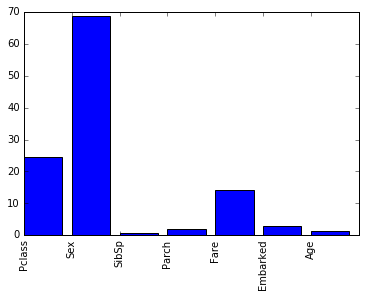

In [201]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(df_features, df["Survived"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(7), scores)
plt.xticks(range(7),["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Age"], rotation='vertical')
plt.show()

In [89]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=60, learning_rate=0.01)
scores = cross_validation.cross_val_score(clf, df_features, df["Survived"], cv=5)
print scores

[ 0.80446927  0.80446927  0.78651685  0.75280899  0.78531073]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=8, min_samples_split=60, min_samples_leaf=8, learning_rate=0.1)
scores = cross_validation.cross_val_score(clf, df_features, df["Survived"], cv=5)
print scores
clf.fit(df_features, df["Survived"])


[ 0.83240223  0.82681564  0.83707865  0.82022472  0.85875706]


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=8, min_samples_split=60,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [84]:
predictions = clf.predict(df_test_features)

In [85]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": predictions
    })

In [86]:
submission.to_csv('submission_.csv', index=False)

In [134]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1, n_estimators=60, max_depth=8, min_samples_split=80, min_samples_leaf=8, learning_rate=0.07)
clf.fit(df_features, df["Survived"])


GradientBoostingClassifier(init=None, learning_rate=0.07, loss='deviance',
              max_depth=8, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=8, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [78]:
predictions = clf.predict(df_test_features)

In [79]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": predictions
    })

In [80]:
submission.to_csv('submit.csv', index=False)

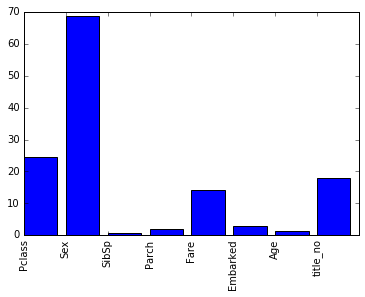

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(df_features, df["Survived"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(8), scores)
plt.xticks(range(8),["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Age", "title_no"], rotation='vertical')
plt.show()

In [58]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_no
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392,1.232323
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,0.450853
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,3.000000


In [61]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df_test['family_size'] = df_test['SibSp'] + df_test['Parch'] + 1

In [63]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title_no,family_size
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,0.464115,1.203349,1.839713
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516,0.420447,1.519072
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,1.000000,1.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,3.000000,11.000000


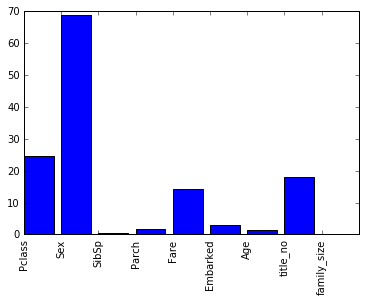

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=3)
selector.fit(df_features, df["Survived"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(9), scores)
plt.xticks(range(9),["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Age", "title_no", "family_size"], rotation='vertical')
plt.show()

In [74]:
pd.crosstab(df["family_size"], df["Survived"], margins=True)

Survived,0,1,All
family_size,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7
